<a href="https://colab.research.google.com/github/IndraniMandal/New-Revisions/blob/main/Regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

In regression problem we try to model continuous values rather than classifying a set of discrete values such as “salary” or “weight”. Many different models can be used, the simplest is linear regression. It tries to fit data with the best hyperplane which goes through the points.

Regression analysis is a statistical technique used to model and understand the relationship between a dependent variable and one or more independent variables. There are several types of regression techniques, each suited for different types of data and different types of relationships.

## [Types of Regression](https://www.analyticsvidhya.com/blog/2022/01/different-types-of-regression-models/)

<img src = "https://drive.google.com/uc?id=11Ks8GFOUpfH1MPgD9uKh1xZf8Lqox6Kk" width=400>




## Linear Regression

<img src = "https://drive.google.com/uc?id=1GSgMdKffaKVAuiCKHA0GSBd0o5tJ446t" width=400>


In linear regression we try to fit a line through (x,y) data.  This line becomes an estimator that, given an x value, will estimate the corresponding y value.

Here is an example which given the speed of a car gives the breaking distance.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# get our dataset
url = 'https://raw.githubusercontent.com/IndraniMandal/ds-assets/main/assets/cars.csv' # the URL
cars_df = pd.read_csv(url)
cars_df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


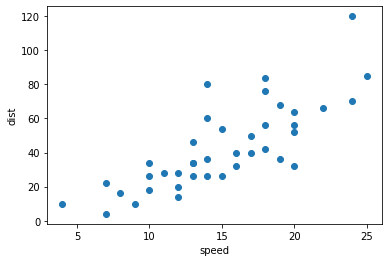

In [3]:
# the array only has a single feature
features= cars_df['speed'].values.reshape(-1,1)
#target
target= cars_df['dist']

# split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                    train_size=0.8, test_size=0.2, random_state=2)
plt.scatter(X_train, y_train)
plt.xlabel('speed')
plt.ylabel('dist')
plt.show()

We will model the relationship between speed and distance with a linear model.

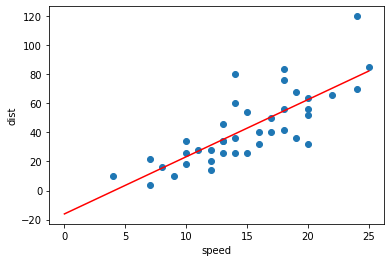

slope:  [3.93451963]
intercept: -16.09


In [4]:
# pick model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

# plot the model ontop of the data
# plot the data
plt.scatter(X_train, y_train)
plt.xlabel('speed')
plt.ylabel('dist')

# plot the model
x_ticks = [0,25]
y_ticks = [model.coef_[0] * i + model.intercept_ for i in x_ticks]
plt.plot(x_ticks,y_ticks,"r-")
plt.show()

# look at the model parameters
print("slope: ", model.coef_)
print("intercept: {:3.2f}".format(model.intercept_))

## Regression Model Evaluation

Regression models do not have a notion of **classification accuracy** as we saw with decision trees and perceptrons, but they have an [$R^2$ score](https://en.wikipedia.org/wiki/Coefficient_of_determination).  Here, the closer to 1.0 the score the better the model. 


In [5]:
# Training R^2 score 
print("Train R^2 score: {:3.2f}".format(model.score(X_train, y_train)))

Training R^2 score: 0.62


In [6]:
from sklearn import metrics 
# Model prediction on test data with linear regression
pred = model.predict(X_test)
print("Test R^2 score: {:3.2f}".format(metrics.r2_score(y_test, pred)))

Test R^2 score: 0.74


Not that great.  The low score is mainly due to the fact of the large errors (also called residuals) at the higher end of the speed spectrum.  The problem is that the data probably does not follow a linear relationship between speed and braking distance.  Let's try a different (non-linear) regression model to see if it can pick up this non-linear relationship.

## Non-Linear Regression: Regression Trees

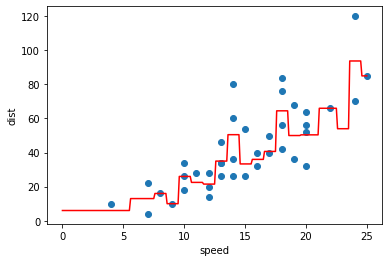

R^2 score: 0.73


In [7]:
# pick model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=None)
model.fit(features, target)

# plot the model ontop of the data
plt.scatter(X_train, y_train)
plt.xlabel('speed')
plt.ylabel('dist')

# 0 to 25 in .1 increments
x_ticks = pd.DataFrame(list(range(0,251))) / 10.0
y_ticks = pd.DataFrame(model.predict(x_ticks))
plt.plot(list(x_ticks[0]),list(y_ticks[0]),"r-")
plt.show()

# compute the R^2 score 
print("R^2 score: {:3.2f}".format(model.score(X_train, y_train)))

Yes, going to a non-linear regression model certainly improved things.  Although we have to be careful, the reported model performance is likely too optimistic, the model is **overfit**,  because we let the tree model grow without any constraints. We will take a look at this issue once we learn how to evaluate models properly and put some confidence values the obtained results.

## Regression Confidence Intervals
When performing regression we use the $R^2$ score to examine the quality of our models. Given that we only use a small training dataset for fitting the model compared to the rest of the data universe it is only natural to ask what the 95% confidence interval for this score might be. We have a formula for that -- it is not as straight forward as the confidence interval for classification,

\begin{equation}
lb = R^2 - 2\sqrt\frac{4R^2(1-R^2)(n-k-1)}{(n^2-1)(n+3)}
\end{equation}

\begin{equation}
ub = R^2 + 2\sqrt\frac{4R^2(1-R^2)(n-k-1)}{(n^2-1)(n+3)}
\end{equation}

Here, `n` is the number of observations in the validation/testing dataset and `k` is the number of independent variables.

###95% confidence intervals for regression problems

In [8]:
def regression_confint(rs_score, n, k):
    '''
    Compute the 95% confidence interval for a regression problem.
      rs_score -- R^2 score
      n        -- number of observations used to compute the R^2 score
      k        -- number of independent variables in dataset
    Returns a tuple (lb,ub)
    Reference:
    https://books.google.com/books?id=gkalyqTMXNEC&pg=PA88#v=onepage&q&f=false
    '''
    import math
    interval = 2*math.sqrt((4*rs_score*(1-rs_score)**2*(n-k-1)**2)/((n**2 - 1)*(n+3)))
    lb = max(0, rs_score - interval)
    ub = min(1.0, rs_score + interval)
    return (lb,ub)

In [9]:
rs_score = .75
observations = 100
variables = 4 # independent variables

lb,ub = regression_confint(rs_score, observations, variables)
print("R^2 Score: {:3.2f} ({:3.2f}, {:3.2f})".format(rs_score,lb,ub))

R^2 Score: 0.75 (0.67, 0.83)


### CI for the cars dataset

In [10]:
# R^2 score
from sklearn import metrics 
# Model prediction on test data with linear regression
pred = model.predict(X_test)
rs_score = metrics.r2_score(y_test, pred)
print("Test R^2 score: {:3.2f}".format(rs_score))

observations = cars_df.shape[0]
variables = 1
lb,ub = regression_confint(rs_score, observations, variables)

# print out R^2 score with its 95% confidence interval
print("R^2 Score: {:3.2f} ({:3.2f}, {:3.2f})".format(rs_score,lb,ub))

Test R^2 score: 0.96
R^2 Score: 0.96 (0.94, 0.98)


# Scikit-Learn Models

Scikit-Learn has a "standardized" view of how to build models and evaluate them:

1. Prepare your data (using Pandas)
  * `pd.read_csv`
  * `df.drop`
  * `df.head`
1. Pick your model and instantiate the model object, e.g.
  * decision trees: `tree.DecisionTreeClassifier(criterion='entropy')`
  * linear models: `LinearRegression(fit_intercept=True)`
1. Fit your model: the `fit` function.
1. Evaluate your model:
  * decision trees: `accuracy_score`
  * linear models ($R^2$-score): `score`

# Models

In machine learning we focus on *model performance* rather than looking at the internal model parameters.

For example, from a machine learning perspective in linear models the most important part is the $R^2$ score, the internal model coefficients are really coincidental and are only used to visualize the model.

We see this approach throughout all of the models we will be looking at.  Furthermore, some machine learning models simply do not have useful model parameters to look at, *e.g.*, neural networks.